In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('WEEK4.csv')#readingfile

In [9]:
data = pd.concat([data,pd.get_dummies(data['color']).drop('white',axis=1)],axis = 1)
data = data.drop('color',axis = 1)#droppingcolorwhite

In [10]:
data.head()

,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,2899,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5350,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,25000,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,27700,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5700,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


(array([336., 507., 511., 451., 184.,  67.,  60.,  23.,  11.,   3.]),
 array([2.50000e+01, 7.42250e+03, 1.48200e+04, 2.22175e+04, 2.96150e+04,
        3.70125e+04, 4.44100e+04, 5.18075e+04, 5.92050e+04, 6.66025e+04,
        7.40000e+04]),
 <a list of 10 Patch objects>)

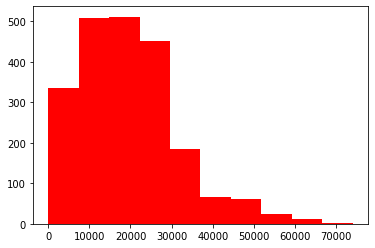

In [15]:
from sklearn.model_selection import train_test_split as tts
plt.hist(data['price'],color='r') #leftskewed#applylogtransform#applysqrttramsform

<function matplotlib.pyplot.show(*args, **kw)>

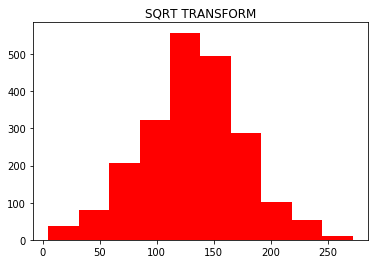

In [16]:
plt.hist(np.sqrt(data['price']),color='r')#using numpy for sqrt transform
plt.title("SQRT TRANSFORM")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

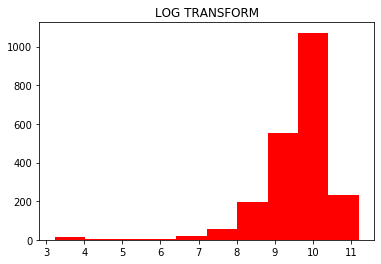

In [17]:
plt.hist(np.log(data['price']),color='r')#using numpy for log transform
plt.title("LOG TRANSFORM")
plt.show

In [18]:
# clearly sqrt transform was better
#WE CONVERT PRICES TO THEIR SQRT AND ROUND OFF DECIMALS TO TWO
data['price'] = round(np.sqrt(data['price']),2)

In [19]:
#splitting data
X_train,X_test,y_train,y_test=tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)

In [20]:
#printing shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1722, 25)
(431, 25)
(1722,)
(431,)


In [30]:
#applying linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
LR=LinearRegression()
LR.fit(X_train,y_train)
# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("Linear Regression Training R2 score is " + str(r2_score(np.square(y_train),np.square(LR.predict(X_train)))))
print("Linear Regression Testing R2 score is " + str(r2_score(np.square(y_test),np.square(LR.predict(X_test)))))

Linear Regression Training R2 score is 0.3577935806672947
Linear Regression Testing R2 score is 0.3340597013410348


In [55]:
y_pred=LR.predict(X_test)
mean_squared_error(np.square(y_test),np.square(y_pred))  


93998879.06677723

In [57]:
y_pred2=LR.predict(X_train)
mean_squared_error(np.square(y_train),np.square(y_pred2)) 

90997459.24037871

In [60]:
y_pred=LR.predict(X_test)
mean_absolute_error(np.square(y_test),np.square(y_pred)) 


6926.987292556907

In [61]:
y_pred2=LR.predict(X_train)
mean_absolute_error(np.square(y_train),np.square(y_pred2)) 


6864.98050501778

In [71]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=7,random_state=1,criterion='mse')
DT.fit(X_train,y_train)
# FIND TEST ERROR AND TRAIN ERROR WITH THE METRICS IMPORTED ABOVE
# NOTE THAT WE HAVE SQUARED BACK THE VALUES AS WE ARE PREDICTING PRICES NOT THEIR SQUARE ROOT 
print("DT Training R2 score is " + str(r2_score(np.square(y_train),np.square(DT.predict(X_train)))))
print("DT TestingR2 score is " + str(r2_score(np.square(y_test),np.square(DT.predict(X_test)))))

DT Training R2 score is 0.422869230755335
DT TestingR2 score is 0.36145560633416207


In [80]:
y_pred=DT.predict(X_train)
print(mean_squared_error(np.square(y_train),np.square(y_pred)))
y_pred2=DT.predict(X_test)
print(mean_squared_error(np.square(y_test),np.square(y_pred2))) 
print(mean_absolute_error(np.square(y_train),np.square(y_pred)) )
print(mean_absolute_error(np.square(y_test),np.square(y_pred2)))



81776562.90835412
90131889.2396716
6266.244817595775
6846.025816839579


In [83]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=200,max_depth=9,n_jobs=-1,random_state=1)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [84]:
y_pred=RF.predict(X_test)
mean_absolute_error(np.square(y_test),np.square(y_pred))

6695.668840563838

In [85]:
y_pred=RF.predict(X_test)
mean_squared_error(np.square(y_test),np.square(y_pred)) 

84727778.65210524

In [86]:
# WE FIND THE MEDIAN
np.square(data['price']).describe()

count     2153.000000
mean     19298.257905
std      11904.254199
min         25.000000
25%      10799.366400
50%      17300.140900
75%      26001.562500
max      74000.320900
Name: price, dtype: float64

In [87]:
#WE WILL DO BINARY CLASSIFICATION AND DIVIDE THE DATA EQUALLY(ALMOST) INTO 1's AND 0's
#WE HAVE CHOSEN THRESHOLD AT price = 20000

data.loc[np.square(data['price']) < 20000,'price'] = 0
data.loc[np.square(data['price']) >= 20000,'price'] = 1

In [88]:
data.head()


,price,year,mileage,AGE_IN_YEARS,chevrolet,dodge,gmc,jeep,nissan,salvage insurance,...,Goa,MP,Maharashtra,UP,black,blue,gray,no_color,red,silver
0,0.0,2011,190552.0,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2018,39590.0,2,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,2014,64146.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1.0,2018,6654.0,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.0,2018,45561.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [89]:
X_train,X_test,y_train,y_test = tts(data.drop('price',axis = 1),data['price'],test_size = 0.2,random_state = 1)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [104]:
l=LogisticRegression(solver='lbfgs',max_iter=2000,C=0.5,penalty='l2',random_state=1)
l.fit(X_train,y_train)
y_pred=l.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
#cnf_matrix
# START CODE
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
print((TP)/float(TP+FN))#sensitivity recall or tpr
print((TN)/float(TN+FP))#specificity or tnr
print((TP)/float(TP+FP))#precision
print((TP+TN)/float(TP+TN+FP+FN))#accuracy
print((FP)/float(FP+TN))#fpr

0.6502115655853314
0.771964461994077
0.6661849710982659
0.721835075493612
0.228035538005923


In [108]:
svm=SVC(kernel='rbf',max_iter=1000,gamma='scale',random_state=1)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
#cnf_matrix
# START CODE
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
print((TP)/float(TP+FN))#sensitivity recall or tpr
print((TN)/float(TN+FP))#specificity or tnr
print((TP)/float(TP+FP))#precision
print((TP+TN)/float(TP+TN+FP+FN))#accuracy
print((FP)/float(FP+TN))#fpr

0.5063469675599436
0.8509378084896347
0.703921568627451
0.7090592334494773
0.14906219151036526


In [111]:
d=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
d.fit(X_train,y_train)
y_pred=d.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
#cnf_matrix
# START CODE
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
print((TP)/float(TP+FN))#sensitivity recall or tpr
print((TN)/float(TN+FP))#specificity or tnr
print((TP)/float(TP+FP))#precision
print((TP+TN)/float(TP+TN+FP+FN))#accuracy
print((FP)/float(FP+TN))#fpr

0.5430183356840621
0.8775913129318855
0.756385068762279
0.7398373983739838
0.12240868706811452


In [112]:
r=RandomForestClassifier(criterion='gini',max_depth=3,n_estimators=100,random_state=1)
r.fit(X_train,y_train)
y_pred=r.predict(X_train)
cnf_matrix = confusion_matrix(y_train, y_pred)
#cnf_matrix
# START CODE
TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
print((TP)/float(TP+FN))#sensitivity recall or tpr
print((TN)/float(TN+FP))#specificity or tnr
print((TP)/float(TP+FP))#precision
print((TP+TN)/float(TP+TN+FP+FN))#accuracy
print((FP)/float(FP+TN))#fpr

0.5444287729196051
0.8795656465942744
0.7598425196850394
0.7415795586527294
0.12043435340572557
